In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/heart-1.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df[df['target']==1].shape

(165, 14)

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


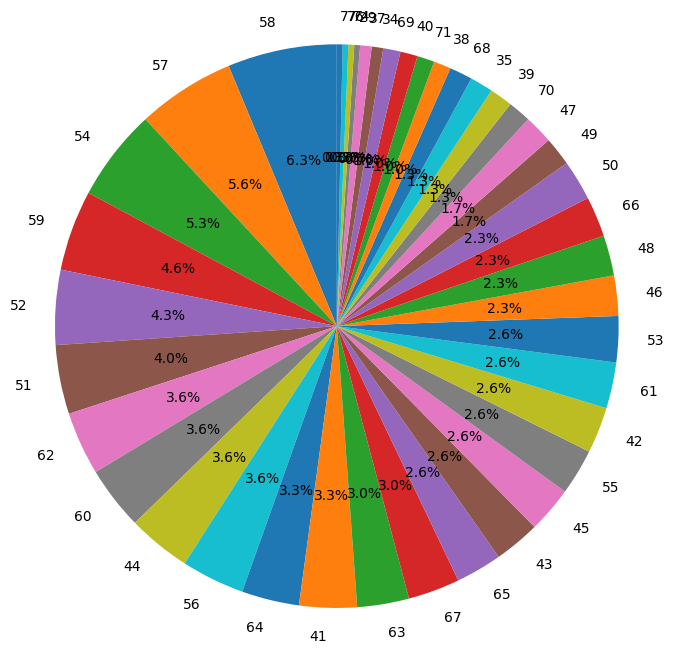

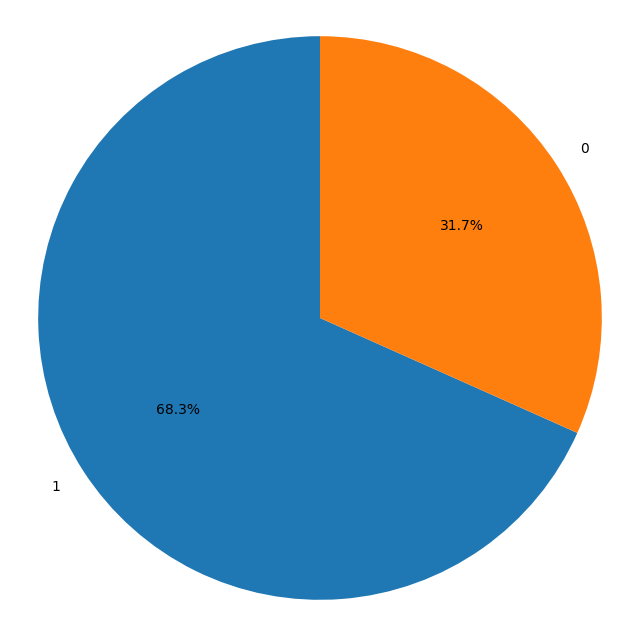

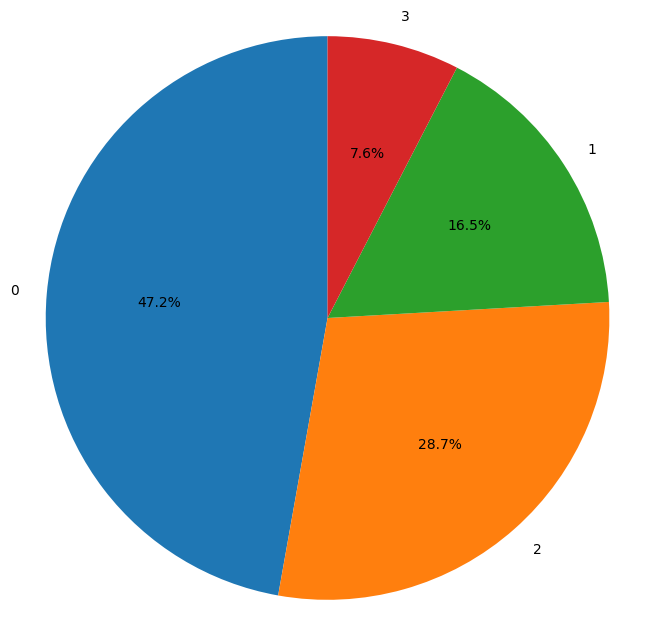

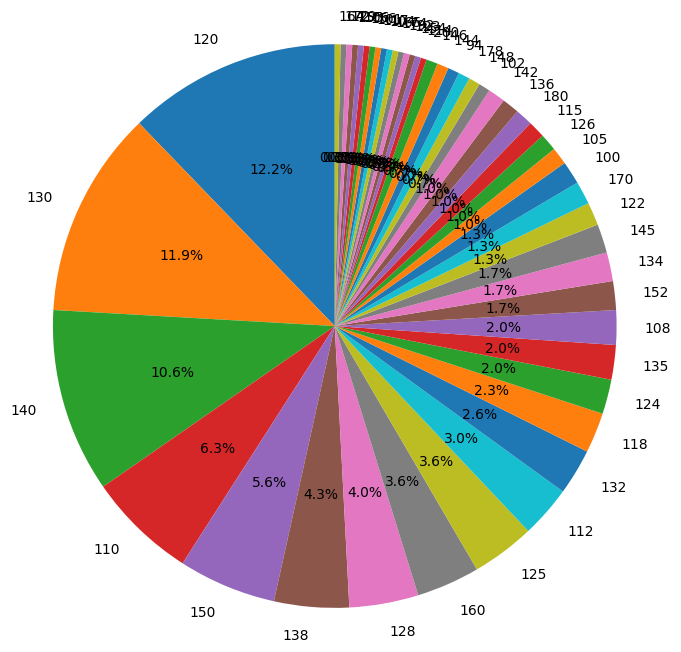

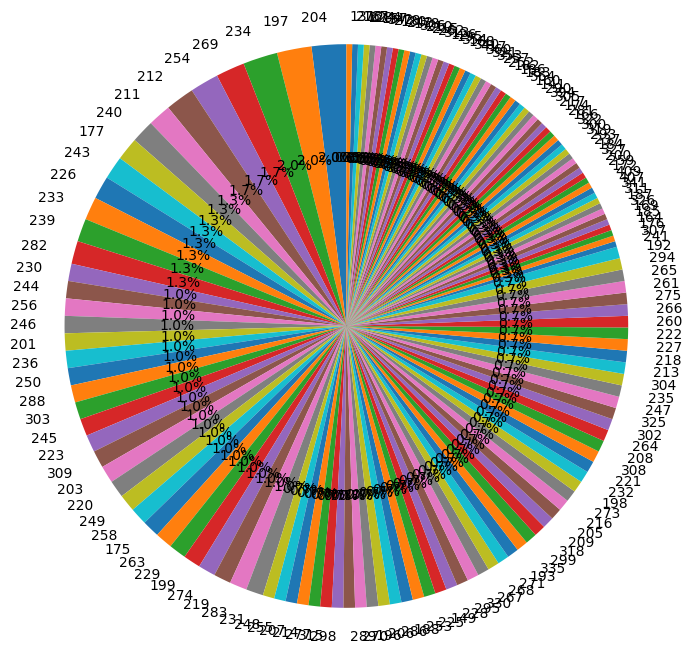

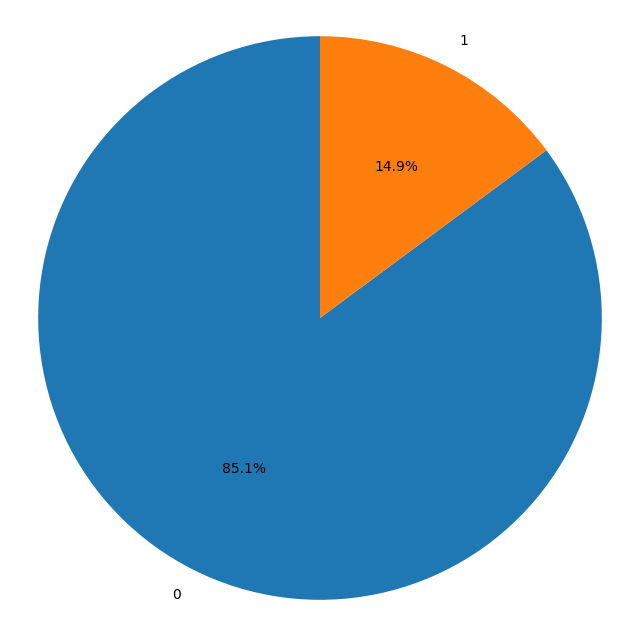

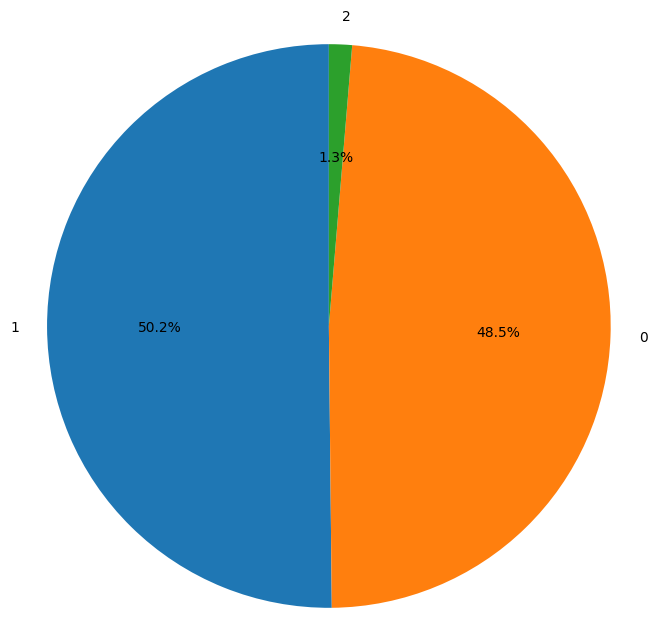

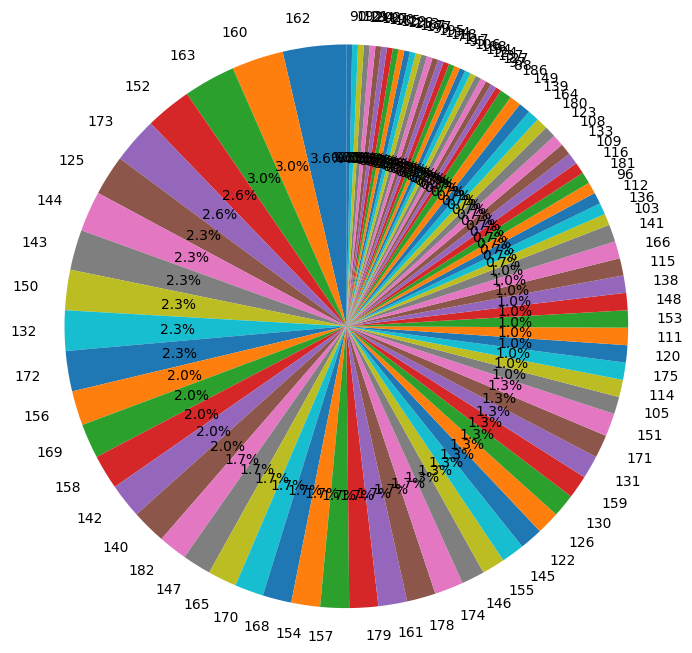

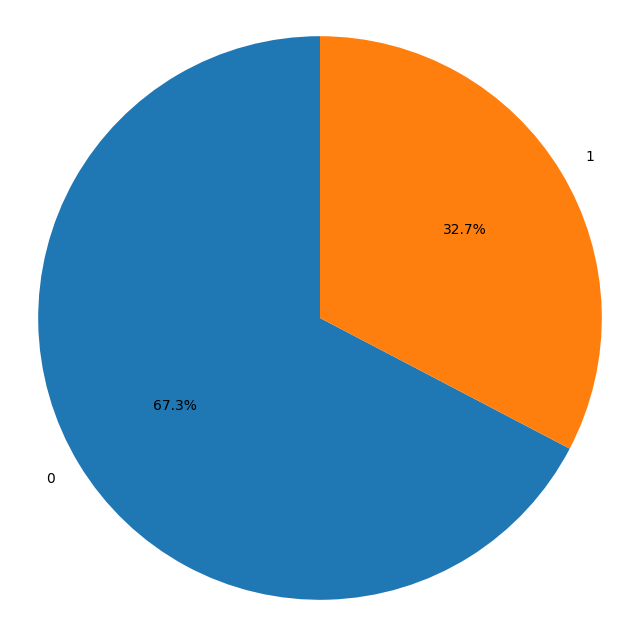

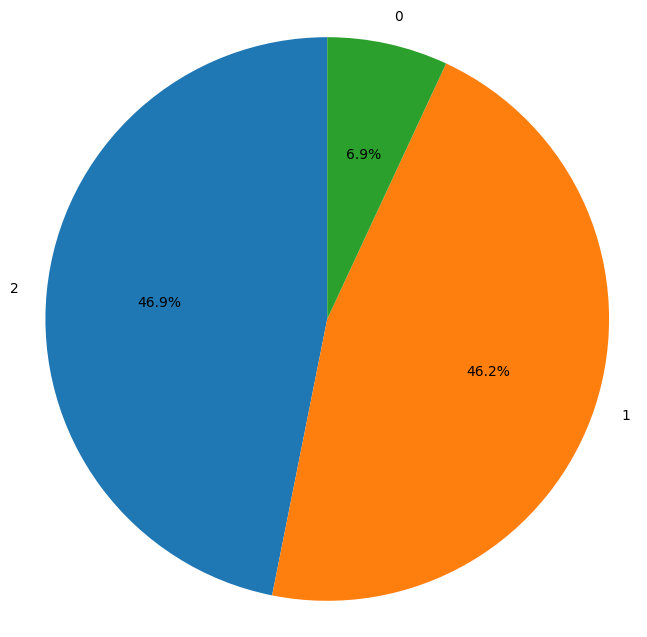

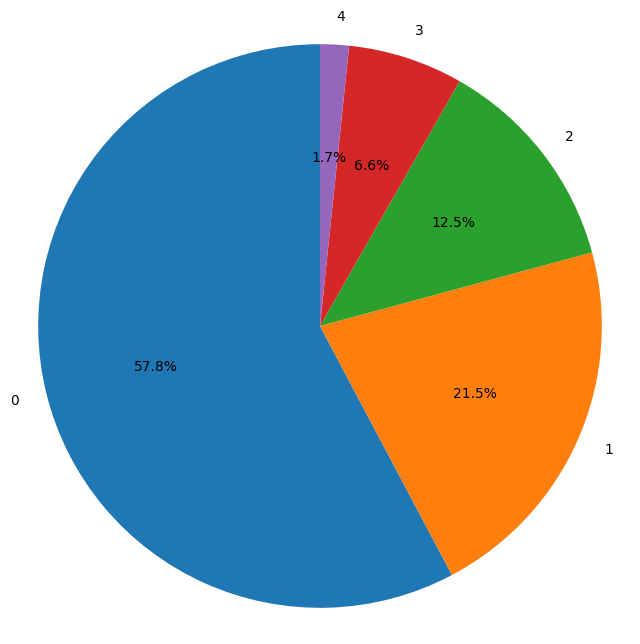

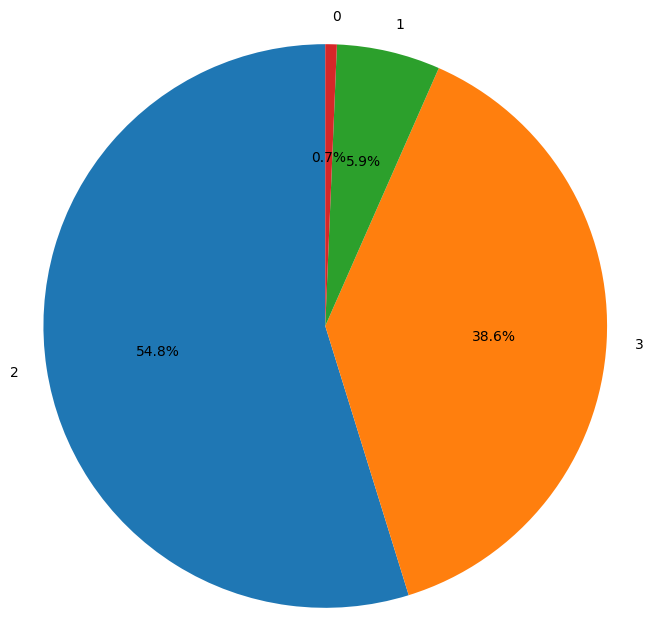

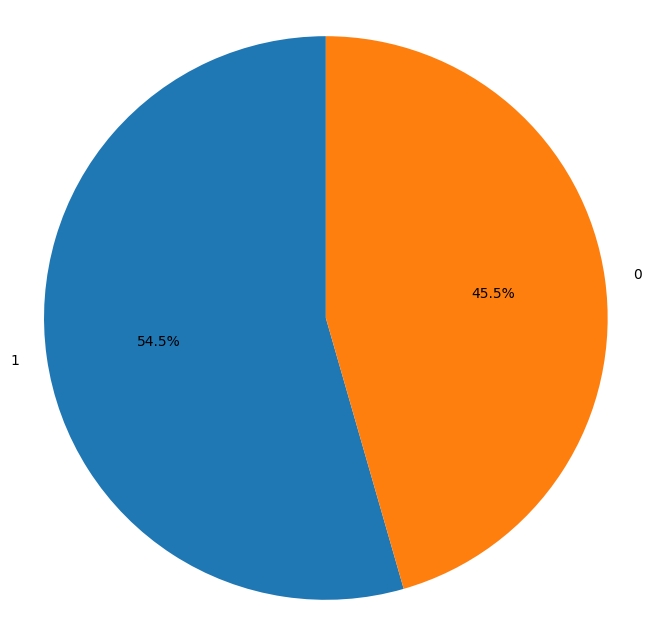

In [ ]:
for i in df.select_dtypes(include='int64').columns:
  plt.figure(figsize=(8,8))
  cnt=df[i].value_counts()
  plt.pie(cnt,labels=cnt.index,autopct='%1.1f%%',startangle=90)
  plt.axis('equal')
  plt.show()

age


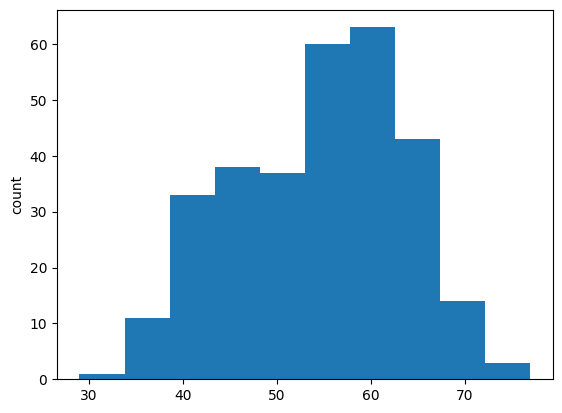

sex


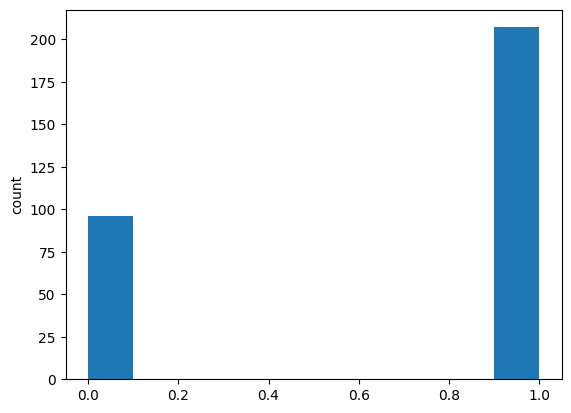

cp


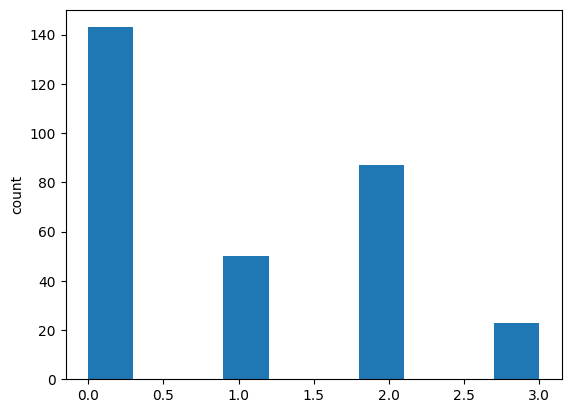

trestbps


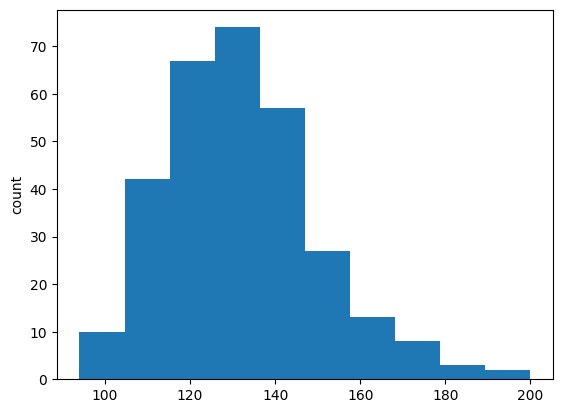

chol


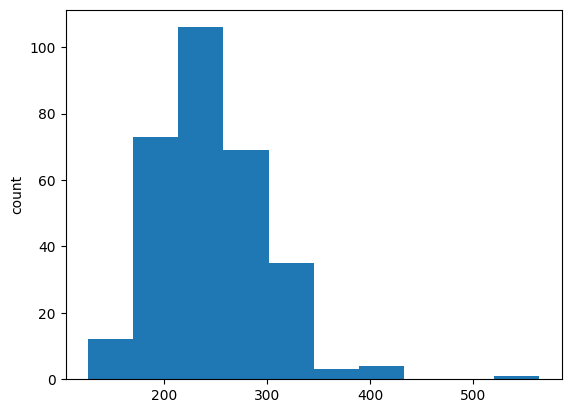

fbs


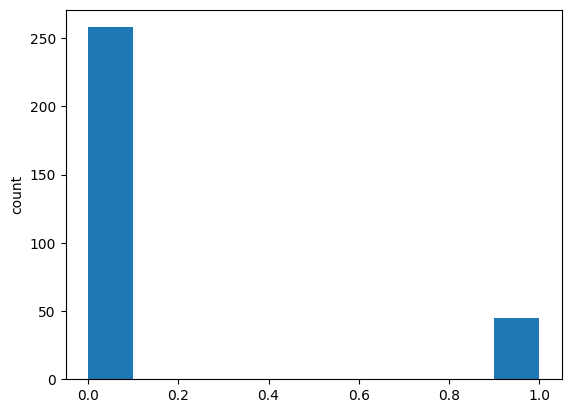

restecg


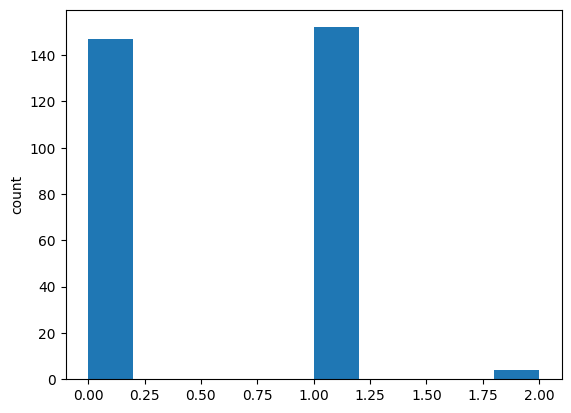

thalach


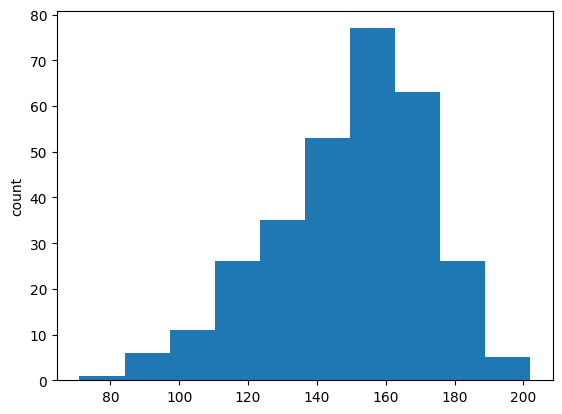

exang


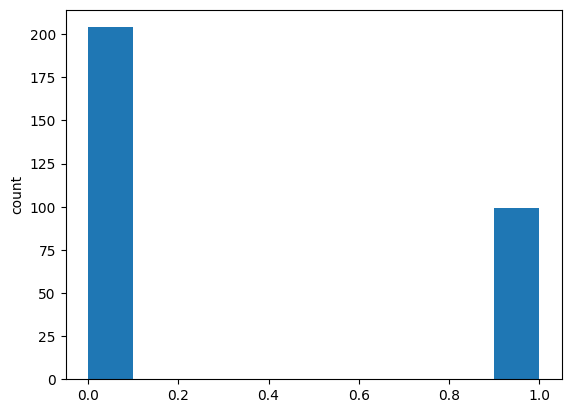

slope


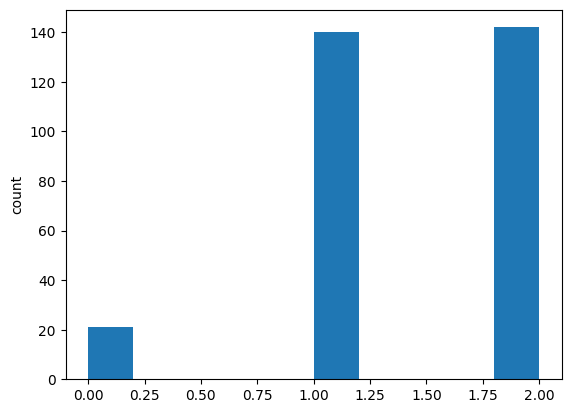

ca


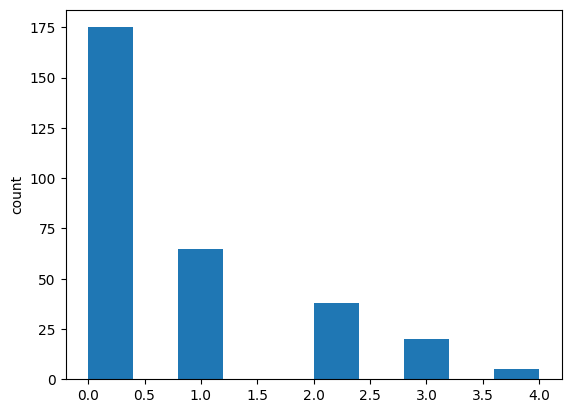

thal


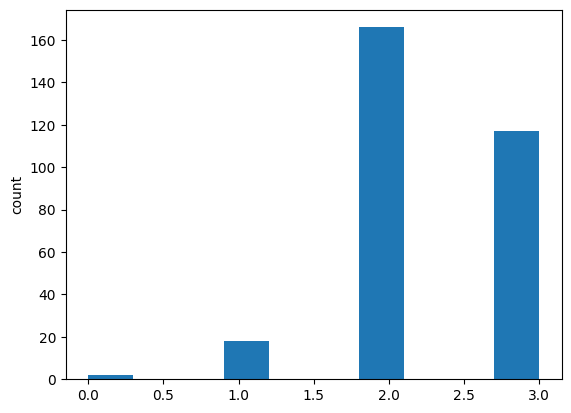

target


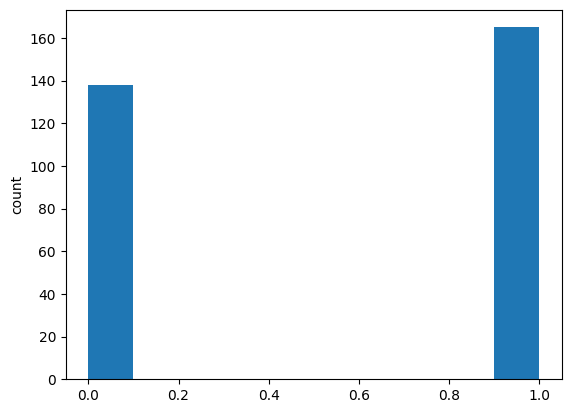

In [ ]:
for i in df.select_dtypes(include='int64').columns:
  plt.hist(df[i])
  print(i)
  plt.ylabel("count")
  plt.show()

<Axes: >

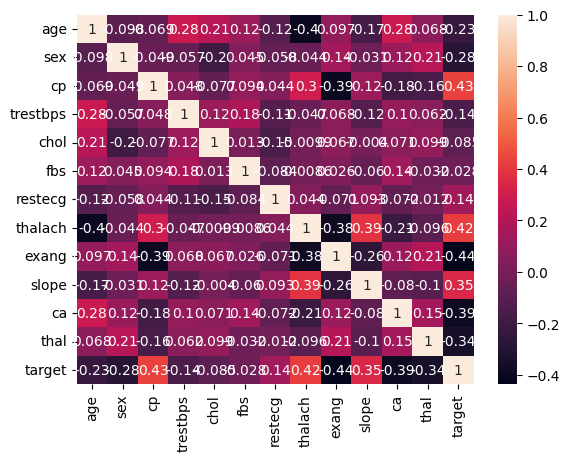

In [ ]:
df_num=df.select_dtypes(include='int64')
sns.heatmap(df_num.corr(),annot=True)

age


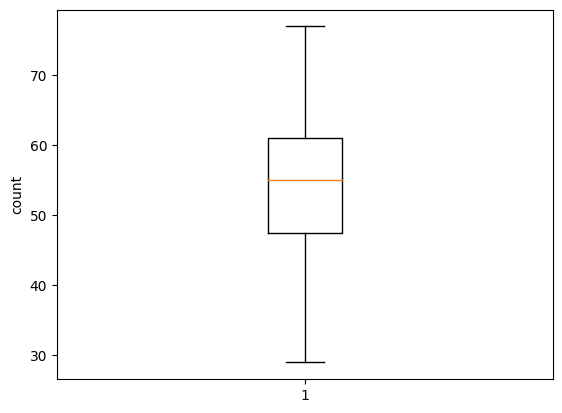

sex


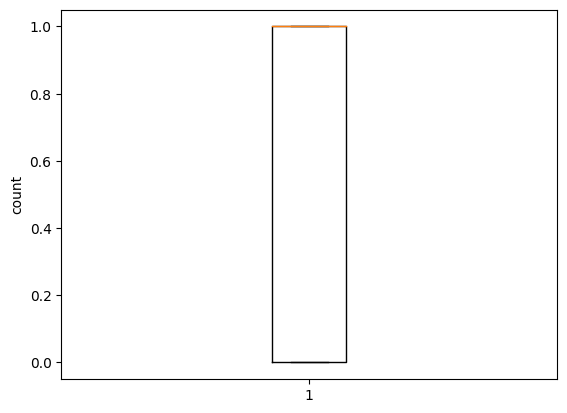

cp


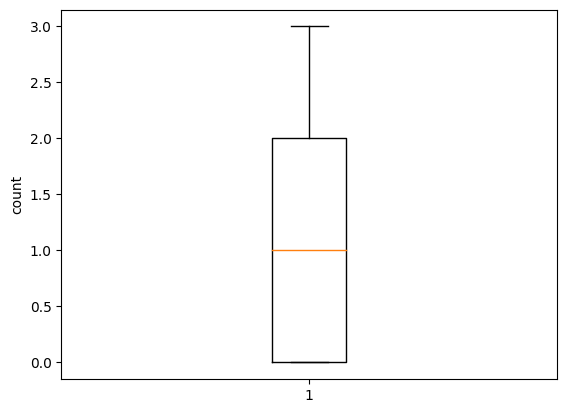

trestbps


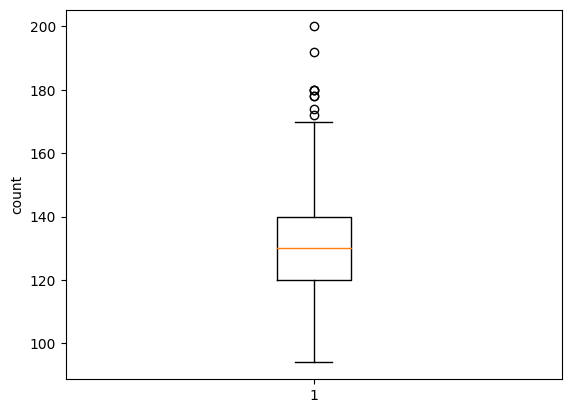

chol


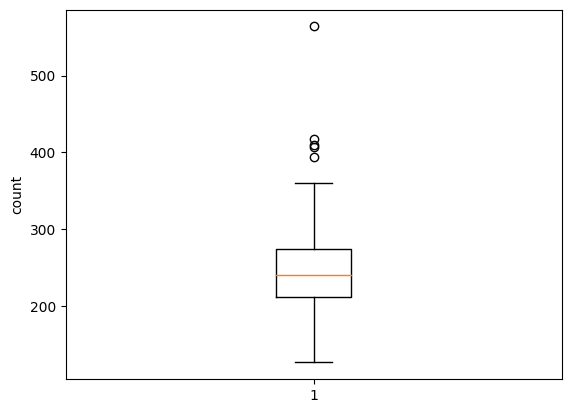

fbs


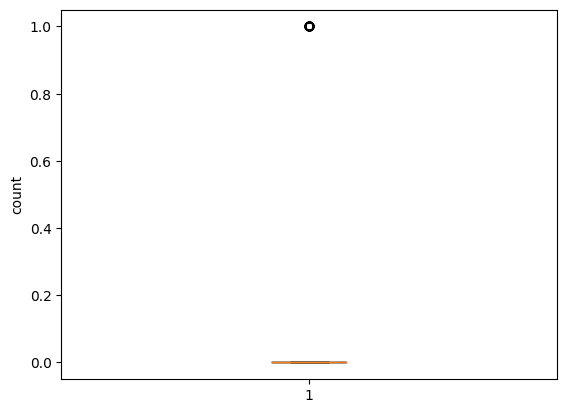

restecg


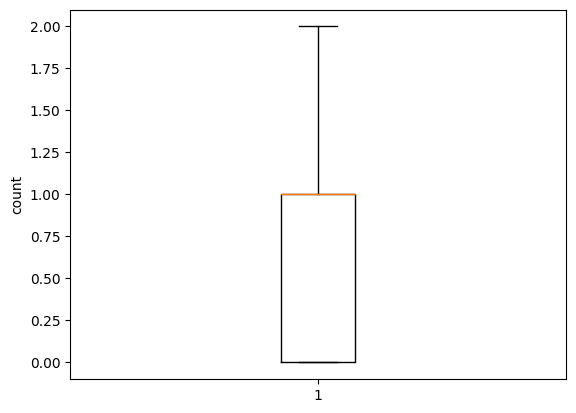

thalach


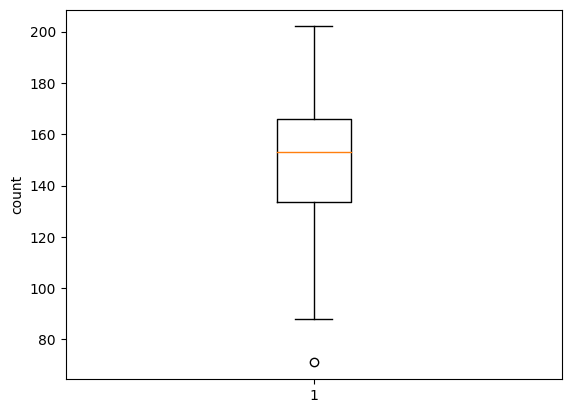

exang


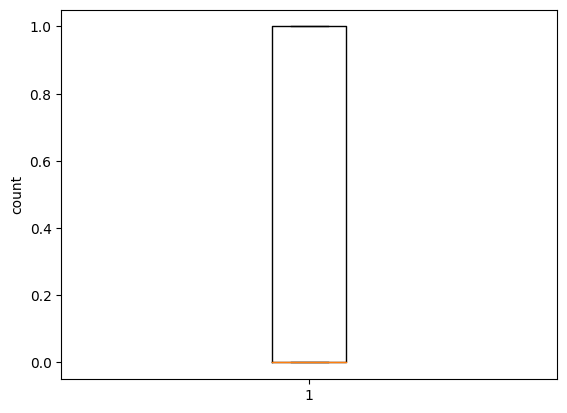

slope


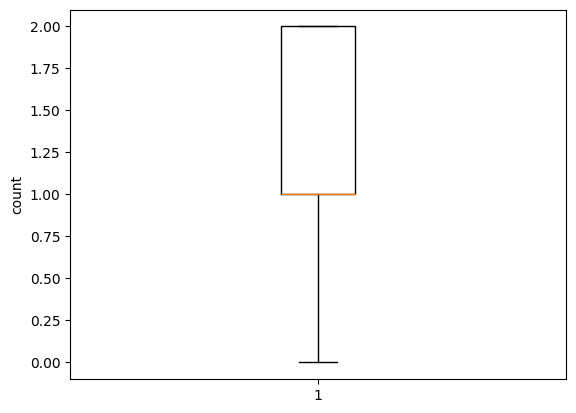

ca


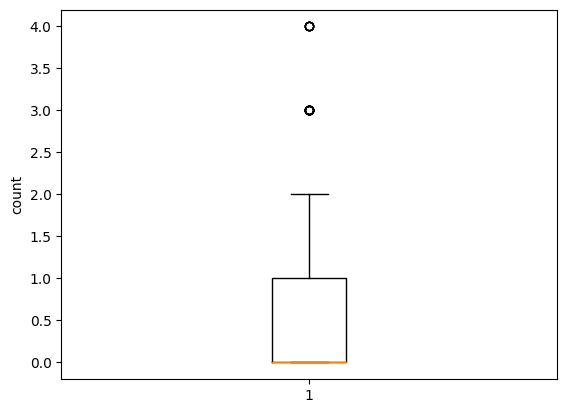

thal


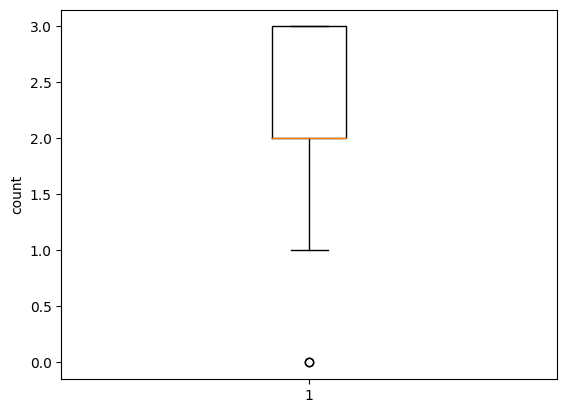

target


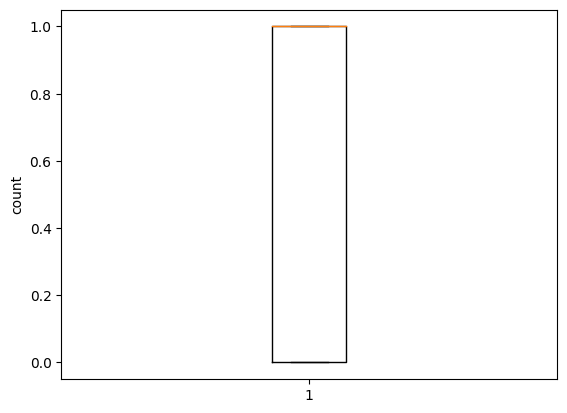

In [ ]:
for i in df.select_dtypes(include='int64').columns:
  plt.boxplot(df[i])
  print(i)
  plt.ylabel("count")
  plt.show()

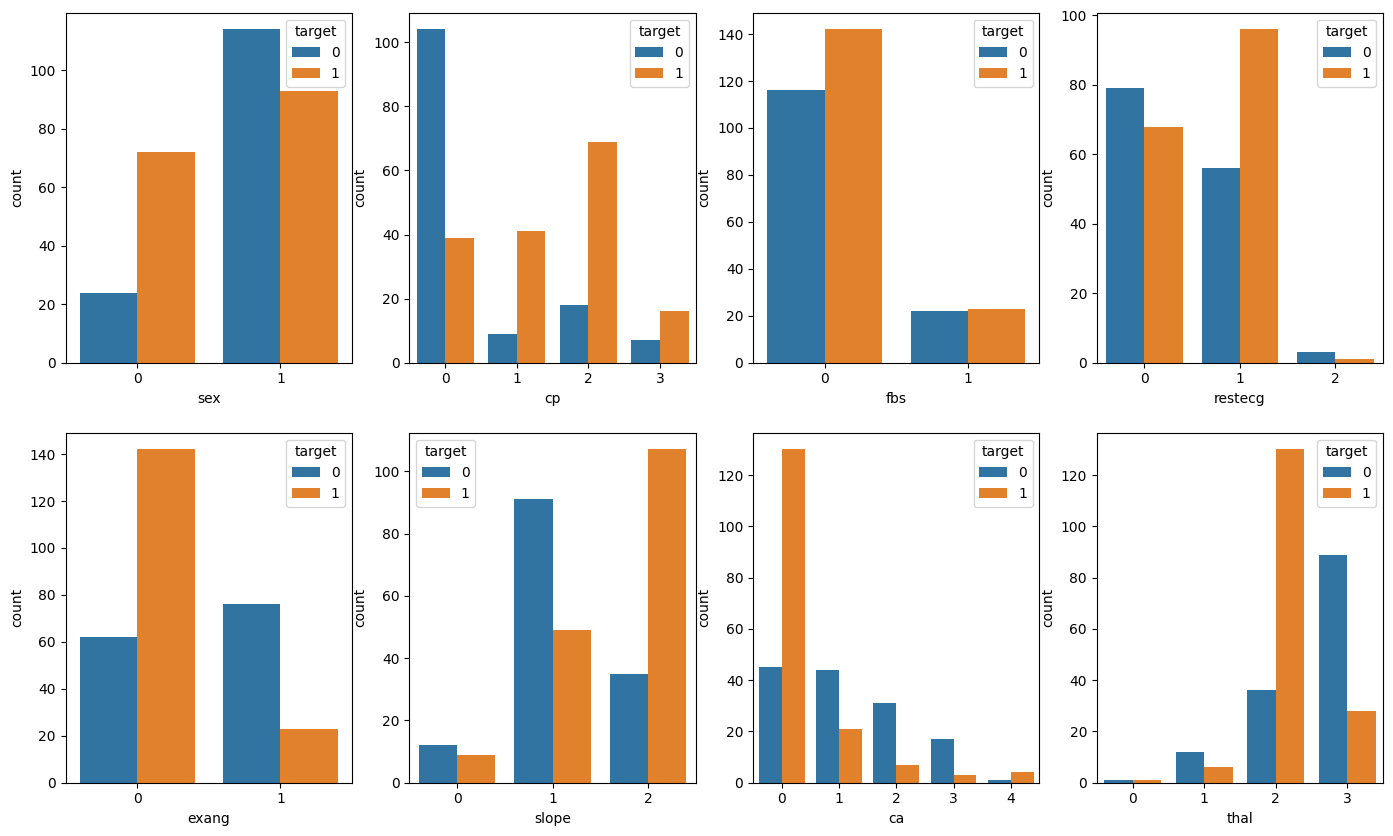

In [ ]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(17,10))
cat_feat=['sex','cp','fbs','restecg', 'exang','slope', 'ca', 'thal', 'target']
for idx,feature in enumerate(cat_feat):
  if feature!='target':
    ax = axes[int(idx/4), idx%4]
    sns.countplot(x=feature, hue='target', data=df,ax=ax)

In [ ]:
#interaction features
#(df['chol_trestbps']=df['chol']*df['trestbps']
#df['age_target']=df['age']*df['target']
#df['target_chol']=df['target']*df['chol']
#df['high_cholestrol']=(df['chol']>240).astype(int)
#df.pd.cut(df['age'],bins=10,labels=False))

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
X=df.drop('target',axis=1)
y=df['target']
selector_chi2=SelectKBest(chi2,k=10)
X_new_chi2 = selector_chi2.fit_transform(X,y)
selected_indices_chi2=selector_chi2.get_support(indices=True)
selected_features_chi2=X.columns[selected_indices_chi2]
print("selected features using chi2:",selected_features_chi2)


selected features using chi2: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [ ]:
X= df.loc[:,['age', 'sex', 'cp', 'trestbps', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal']]
y = df['target']
print(X.shape)
print(y.shape)




(303, 10)
(303,)


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
# Assuming X (features) and y (target) are defined
X = df.drop('target', axis=1)
y = df['target']
selector_chi2 = SelectKBest(chi2, k=10)
X_new_chi2 = selector_chi2.fit_transform(X, y)
# Get the indices of the selected features
selected_indices_chi2 = selector_chi2.get_support(indices=True)
selected_features_chi2 = X.columns[selected_indices_chi2]
print("Selected features using chi2:", selected_features_chi2)

Selected features using chi2: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [ ]:
X = df.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak','slope', 'ca']]#independent variable
y = df['target']#dependnet or target value
print(X.shape)
print(y.shape)

(303, 10)
(303,)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.3)
print(x_train.shape)
print(x_test.shape)

(212, 10)
(91, 10)


In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred=dtree.predict(x_test)
y_pred_train=dtree.predict(x_train)
accuracy =accuracy_score(y_test,y_pred)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Accuracy:",accuracy)
print("Accuracy for train:",accuracy_train)

Accuracy: 0.6703296703296703
Accuracy for train: 1.0


Accuracy: 0.6813186813186813
Accuracy_XTrain: 1.0
Confusion Matrix:
 [[28 16]
 [13 34]]


[Text(0.5725806451612904, 0.95, 'cp <= 0.5\ngini = 0.494\nsamples = 212\nvalue = [94, 118]\nclass = 1'),
 Text(0.2903225806451613, 0.85, 'ca <= 0.5\ngini = 0.415\nsamples = 102\nvalue = [72, 30]\nclass = 0'),
 Text(0.17204301075268819, 0.75, 'exang <= 0.5\ngini = 0.492\nsamples = 48\nvalue = [21, 27]\nclass = 1'),
 Text(0.08602150537634409, 0.65, 'age <= 41.5\ngini = 0.236\nsamples = 22\nvalue = [3, 19]\nclass = 1'),
 Text(0.043010752688172046, 0.55, 'sex <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = 0'),
 Text(0.021505376344086023, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.06451612903225806, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.12903225806451613, 0.55, 'chol <= 316.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18]\nclass = 1'),
 Text(0.10752688172043011, 0.45, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = 1'),
 Text(0.15053763440860216, 0.45, 'chol <= 362.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 

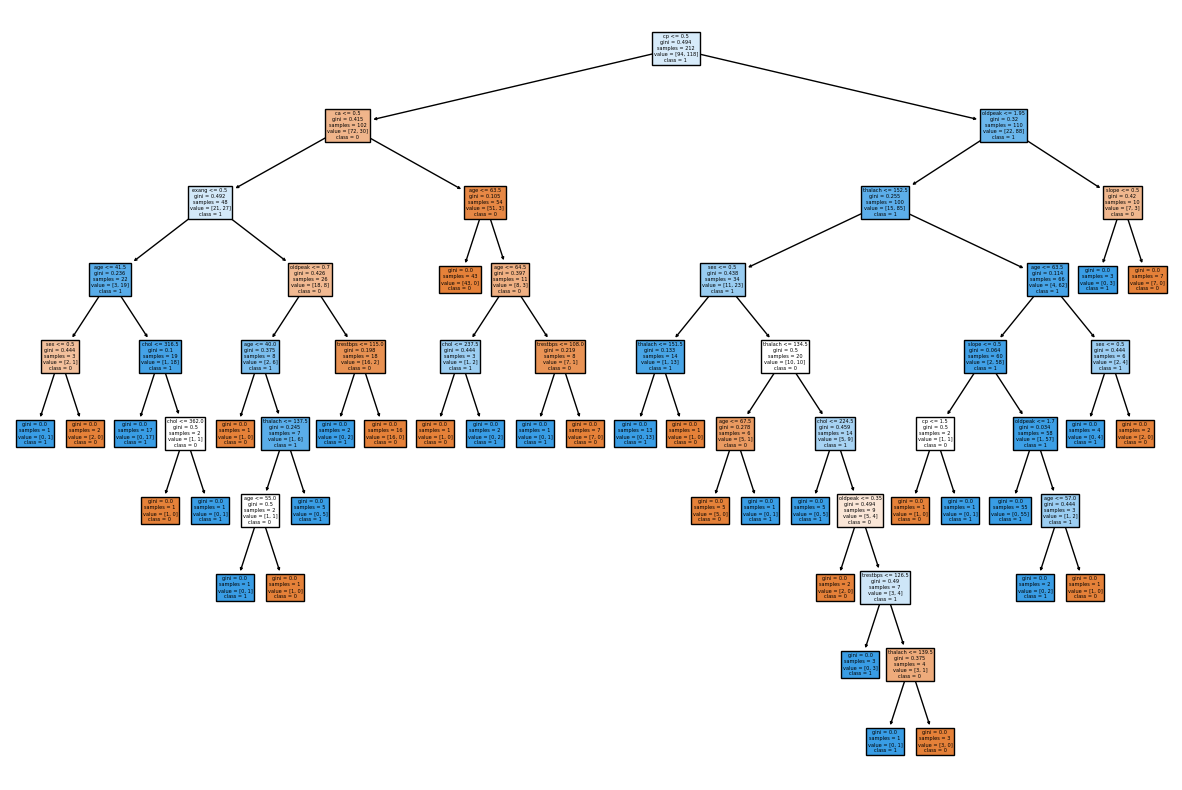

In [ ]:
# prompt: generate decision tree classifier
# Train the Decision Tree Classifier
dtree = DecisionTreeClassifier() #criterion='gini'
dtree.fit(x_train, y_train)
# Make predictions on the test set
y_pred = dtree.predict(x_test)
y_pred_train=dtree.predict(x_train)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("Accuracy_XTrain:",accuracy_train)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
#Plot the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True, feature_names=X.columns,class_names=['0','1'])

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid ={
    'criterion': ['gini','entropy'],
    'max_depth': [None,10,20,30,40],
    'min_samples_split': [2,5,10,15],
    'min_samples_leaf': [1,2,4,5]
}
dtree = DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=5,scoring='accuracy')
grid_search.fit(x_train,y_train)
best_params=grid_search.best_params_
print("Best Hyperparameters: ",best_params)
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(x_test)
y_pred_train = best_dtree.predict(x_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy)
print("Accuracy:",accuracy_train)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.7582417582417582
Accuracy: 0.9339622641509434


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
param_grid_post_pruning = {
    'ccp_alpha': [0.0,0.001, 0.01, 0.1,0.5]

}

dtree= DecisionTreeClassifier()
grid_search_post_pruning = GridSearchCV(estimator=dtree, param_grid=param_grid_post_pruning, cv=5, scoring='accuracy')
grid_search_post_pruning.fit(x_train, y_train)
best_params_post_pruning = grid_search_post_pruning.best_params_
print("Best Hyperparameters for Post-Pruning:", best_params_post_pruning)
best_dtree_post_pruning = grid_search_post_pruning.best_estimator_
y_pred_post_pruning = best_dtree_post_pruning.predict(x_test)
y_pred_train_post_pruning = best_dtree_post_pruning.predict(x_train)
accuracy_post_pruning = accuracy_score(y_test, y_pred_post_pruning)
accuracy_train_post_pruning = accuracy_score(y_train, y_pred_train_post_pruning)
print("Accuracy for Post-Pruning:", accuracy_post_pruning)
print("Accuracy for Post-Pruning:", accuracy_train_post_pruning)


Best Hyperparameters for Post-Pruning: {'ccp_alpha': 0.01}
Accuracy for Post-Pruning: 0.7252747252747253
Accuracy for Post-Pruning: 0.8915094339622641


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.66      0.72        44
           1       0.73      0.85      0.78        47

    accuracy                           0.76        91
   macro avg       0.77      0.76      0.75        91
weighted avg       0.77      0.76      0.76        91



In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
from google.colab import files
uploaded = files.upload()
data=pd.read_csv('/content/heart-1.csv')
setup(data,target='target')

Saving heart-1.csv to heart-1 (1).csv


,Description,Value
0,Session id,3668
1,Target,target
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model =compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8212,0.8944,0.9061,0.7957,0.8454,0.6355,0.6480,0.0290
lda,Linear Discriminant Analysis,0.8212,0.8953,0.9061,0.7957,0.8454,0.6355,0.6480,0.0480
rf,Random Forest Classifier,0.8169,0.8947,0.8795,0.8035,0.8387,0.6275,0.6334,0.1890
lr,Logistic Regression,0.8119,0.8941,0.8621,0.8049,0.8304,0.6189,0.6265,1.0650
gbc,Gradient Boosting Classifier,0.8119,0.8967,0.8280,0.8316,0.8264,0.6213,0.6280,0.2300
et,Extra Trees Classifier,0.8115,0.8957,0.8629,0.8086,0.8320,0.6188,0.6261,0.1520
qda,Quadratic Discriminant Analysis,0.8026,0.8699,0.8364,0.8076,0.8172,0.6017,0.6117,0.0270
nb,Naive Bayes,0.8024,0.8909,0.8364,0.8114,0.8180,0.5999,0.6109,0.0270
ada,Ada Boost Classifier,0.7881,0.8435,0.8356,0.7918,0.8112,0.5689,0.5737,0.1120
xgboost,Extreme Gradient Boosting,0.7835,0.8672,0.8091,0.7969,0.8011,0.5636,0.5672,0.0750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6818,0.8000,0.7500,0.6923,0.7200,0.3529,0.3545
1,0.7727,0.8833,0.8333,0.7692,0.8000,0.5378,0.5401
2,0.8095,0.8091,0.9091,0.7692,0.8333,0.6147,0.6264
3,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156
4,0.8571,0.9455,0.9091,0.8333,0.8696,0.7123,0.7156
5,0.9048,0.9409,1.0000,0.8462,0.9167,0.8073,0.8228
6,0.7619,0.8909,0.8182,0.7500,0.7826,0.5205,0.5230
7,0.8571,0.9722,0.8333,0.9091,0.8696,0.7123,0.7156
8,0.8571,0.9352,0.9167,0.8462,0.8800,0.7042,0.7077


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8182,0.9167,0.8333,0.8333,0.8333,0.6333,0.6333
1,0.8636,0.8667,0.8333,0.9091,0.8696,0.7273,0.7303
2,0.8095,0.7818,0.9091,0.7692,0.8333,0.6147,0.6264
3,0.9048,0.9909,1.0000,0.8462,0.9167,0.8073,0.8228
4,0.8571,0.9273,0.9091,0.8333,0.8696,0.7123,0.7156
5,0.9048,0.9636,0.9091,0.9091,0.9091,0.8091,0.8091
6,0.8095,0.9273,0.9091,0.7692,0.8333,0.6147,0.6264
7,0.7143,0.9259,0.6667,0.8000,0.7273,0.4324,0.4404
8,0.8095,0.9352,0.8333,0.8333,0.8333,0.6111,0.6111


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [34]:
predictions= predict_model(tuned_model,data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8383,0.9203,0.8727,0.8372,0.8546,0.6726,0.6734


In [35]:
save_model(tuned_model,'saved_model_name')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trestbps',
                                              'chol', 'fbs', 'restecg',
                                              'thalach', 'exang', 'oldpeak',
                                              'slope', 'ca', 'thal'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categ...
                  RandomForestClassifier(bootstrap=